In [1]:
from tensorflow import keras
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [2]:
model = load_model(('./model.h5'), custom_objects={'KerasLayer':hub.KerasLayer})

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2560)              64097680  
                                                                 
 dense_1 (Dense)             (None, 1)                 2561      
                                                                 
Total params: 64,100,241
Trainable params: 2,561
Non-trainable params: 64,097,680
_________________________________________________________________


In [4]:
def predict(dir):
    # img = cv2.imread('./test/pizza.jpg')
    image = load_img(dir, target_size=(224,224))
    img = np.array(image)
    img = img/255.0
    img = img.reshape(1,224,224,3)
    
    if(int(np.round(model.predict(img))) == 1):
        msg = "Es pizza"
    else:
        msg = "No es pizza"
    plt.imshow(image)
    plt.axis("off")
    plt.title(msg)

1/1 [==============================] - 1s 651ms/step


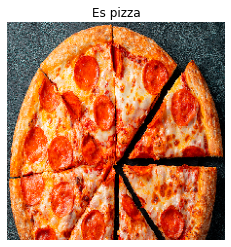

In [6]:
predict('./test/pan.png')